# ANALYSING BANK STOCK THROUGH THE 2008 CRISIS

## TITTLE


In [52]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime 
import matplotlib as mp
import seaborn as sns

%matplotlib inline

In [24]:
start = datetime.datetime(2006,1,1)  #start date

end = datetime.datetime(2016,1,1)    #end date

In [1]:
#getting bank stock data with Panas dataReader

bac = data.DataReader('BAC','yahoo',start,end)
c = data.DataReader("C",'yahoo',start,end)
gs = data.DataReader("GS",'yahoo',start,end)
jpm = data.DataReader("JPM",'yahoo',start,end)
ms = data.DataReader("MS",'yahoo',start,end)
wfc = data.DataReader("WFC",'yahoo',start,end)



NameError: name 'data' is not defined

In [31]:
tickers = ['bac', 'c','gs','jpm','ms','wfc',]

In [44]:
bank_stocks = pd.concat([bac,c,gs,jpm,ms,wfc], axis=1,keys=tickers)

In [45]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        bac                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      c                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.523922  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.146645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.191933  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.139107  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.161732  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         ms                                         wfc             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.045347  
2006-01-04   31.799999  31.530001  10870000.0  20.801256  
2006-01-05   31.500000  31.495001  10158000.0  20.778162  
2006-01-06   31.580000  31.680000   8403800.0  20.900213  
2006-01-09   31.674999  31.674999   5619600.0  20.896914  

[5 rows x 36 columns]

In [46]:
for ticker in tickers:
    print(ticker, bank_stocks[ticker]['Close'].max())

bac 54.900001525878906
c 564.0999755859375
gs 247.9199981689453
jpm 70.08000183105469
ms 89.30000305175781
wfc 58.52000045776367


In [58]:
returns = pd.DataFrame()

for ticker in tickers:
    returns[ticker+' return'] = bank_stocks[ticker]['Close'].pct_change()

returns.head()

,bac return,c return,gs return,jpm return,ms return,wfc return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


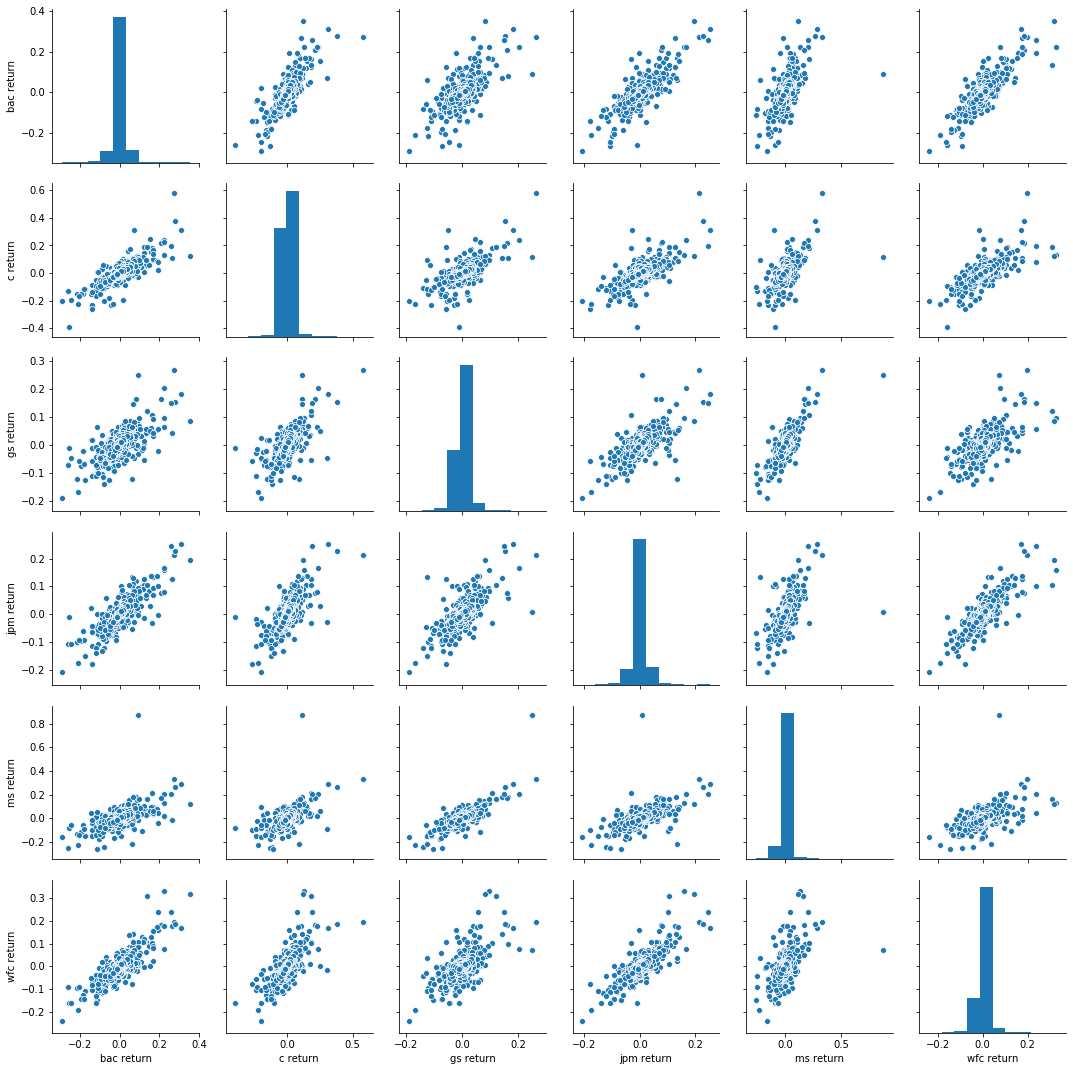

In [56]:
sns.pairplot(returns[1:])